In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set_style("darkgrid")
%matplotlib inline

In [25]:
df = sns.load_dataset('iris')
df.head() #Show first five rows of dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
a = df.species.unique()
a

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [28]:
y = pd.get_dummies(df.species).values
x = df.drop("species", axis=1).values
print(y)
print()
print(x)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=4)

In [30]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(predictions, labels):
    N = labels.size
    mse = ((predictions - labels)**2).sum() / (2*N)
    
    return mse

def accuracy(predictions, labels):
    predicions_correct = predictions.argmax(axis=1) == labels.argmax(axis=1)
    accuracy = predicions_correct.mean()
    
    return accuracy

In [31]:
learning_rate = 0.1
epochs = 15000
N = y_train.size

n_input = 4
n_hidden = 8
n_output = 3

In [32]:
np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)

monitoring = {"mean_squared_error": [], "accuracy": []}

In [33]:
weights_1

array([[ 0.66579325,  0.35763949, -0.77270015, -0.00419192,  0.31066799,
        -0.36004278,  0.13275579,  0.05427426],
       [ 0.00214572, -0.08730011,  0.21651309,  0.60151869, -0.48253284,
         0.51413704,  0.11431507,  0.22256881],
       [-0.56830111,  0.06756844,  0.7422685 , -0.53990244, -0.98886414,
        -0.87168615,  0.13303508,  1.19248367],
       [ 0.56184563,  0.83631111,  0.04957461,  0.69899819, -0.13562399,
         0.30660209, -0.13365859, -0.27465451]])

In [34]:
for epoch in range(epochs):    
    
    # feedforward
    hidden_layer_inputs = np.dot(x_train, weights_1)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs)

    output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
    output_layer_outputs = sigmoid(output_layer_inputs)
    
    
    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    # backpropagation
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

    
    # weight updates
    weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N
    weights_1_update = np.dot(x_train.T, hidden_layer_delta) / N

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df = pd.DataFrame(monitoring)

In [35]:
monitoring_df.head()

,mean_squared_error,accuracy
0,0.143733,0.315385
1,0.143113,0.315385
2,0.142503,0.315385
3,0.141904,0.315385
4,0.141314,0.315385


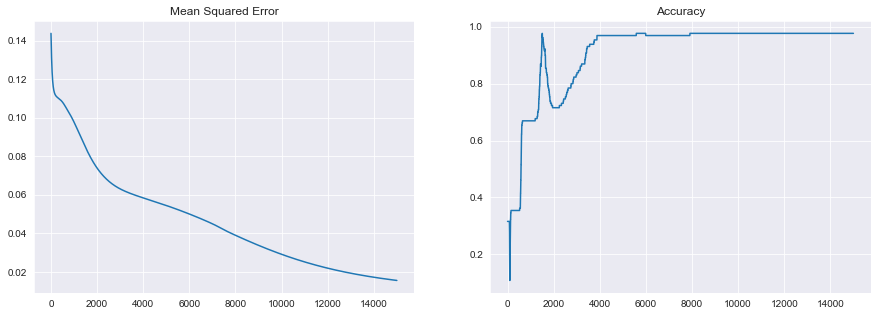

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");

In [22]:
# feedforward
hidden_layer_inputs = np.dot(x_test, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

In [23]:
acc = accuracy(output_layer_outputs, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.95
